# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [3]:
#  1. Get the total rides for each city type
ride_counts_by_type = pyber_data_df.groupby('type').count()['ride_id']
ride_counts_by_type 

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
drivers_by_type = city_data_df.groupby('type').sum()['driver_count']
drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
fares_by_type = pyber_data_df.groupby('type').sum()['fare']
fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = fares_by_type / ride_counts_by_type
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = fares_by_type / drivers_by_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    'Total Rides': ride_counts_by_type,
    'Total Drivers': drivers_by_type,
    'Total Fares': fares_by_type,
    'Average Fare per Ride': average_fare_per_ride,
    'Average Fare per Driver': average_fare_per_driver})
#pyber_summary_df.rename.(columns = {'ride_id:'Total Rides', 'driver_count':'Total Drivers', 'fare':'Total Fares', '0':'Average Fare per Ride', '1':'Average Fare per Driver'}, inplace = True)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df[['Total Fares']] = pyber_summary_df[['Total Fares']].astype(float)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
#pyber_summary_df[['Total Fares']] = pyber_summary_df[['Total Fares']].astype(float)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('{:.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('{:.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('{:.2f}'.format)
pyber_summary_df.head()


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Print the merged DataFrame for reference.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_weekly_data_indexed_df = pyber_data_df.groupby(['type', 'date']).sum()[['fare']]
pyber_weekly_data_indexed_df.head()

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26

In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_weekly_data_reindexed_df = pyber_weekly_data_indexed_df.reset_index()
pyber_weekly_data_reindexed_df.head()

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26


In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_weekly_data_pivot_df = pyber_weekly_data_reindexed_df.pivot(index = 'date', columns = 'type', values = 'fare')
pyber_weekly_data_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31


In [15]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
pyber_Q1_q2_weekly_data_pivot_df = pyber_weekly_data_pivot_df.loc['1/1/2019':'4/28/2019']
pyber_Q1_q2_weekly_data_pivot_df

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/27/2019 6:02,38.33,NaN,NaN
4/27/2019 6:20,NaN,28.29,NaN
4/27/2019 7:18,NaN,18.56,NaN


In [16]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_Q1_q2_weekly_data_pivot_df.index = pd.to_datetime(pyber_Q1_q2_weekly_data_pivot_df.index)

In [17]:
# 6. Check that the datatype for the index is datetime using df.info()
pyber_Q1_q2_weekly_data_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2038 entries, 2019-01-01 00:08:00 to 2019-04-27 08:48:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  532 non-null    float64
 2   Urban     1403 non-null   float64
dtypes: float64(3)
memory usage: 63.7 KB


In [18]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_data_by_week_df = pyber_Q1_q2_weekly_data_pivot_df.resample('W').sum()
pyber_data_by_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


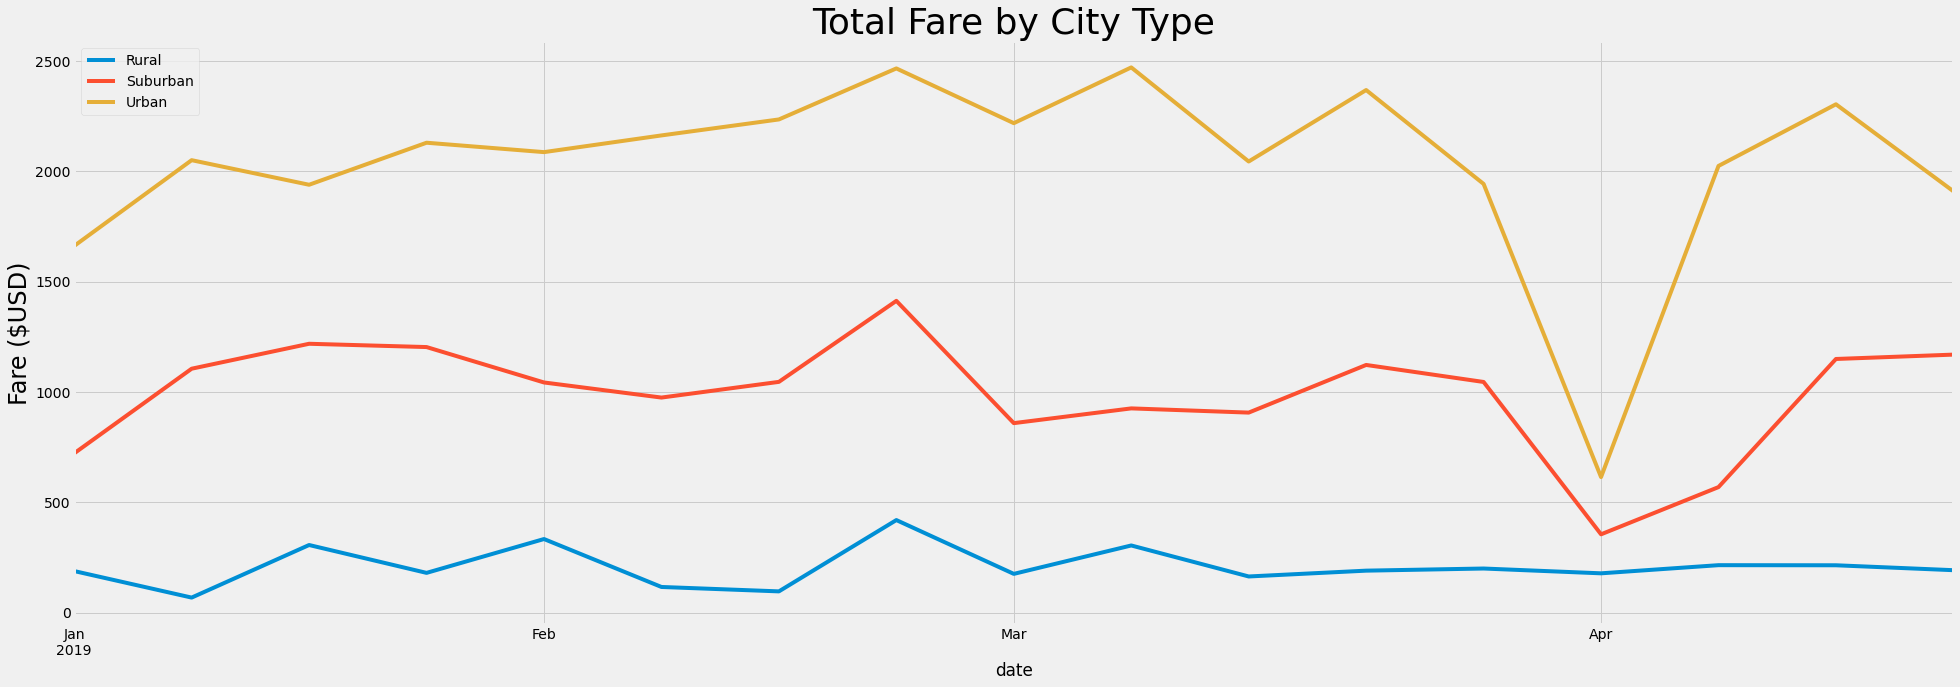

In [24]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
pyber_data_by_week_df.plot(figsize=(30, 10))
plt.ylabel('Fare ($USD)', fontsize = 24)
plt.title('Total Fare by City Type', fontsize = 36)
plt.legend()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig("analysis/Fig8.png")